<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load Data

In [4]:
# Read Data
diab = pd.read_csv(r'C:\Users\ryant\Desktop\IOD\DATA\diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [55]:
diab.info()
#no null values and data types are all numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
diab.describe().T
#no negatives for chi2

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


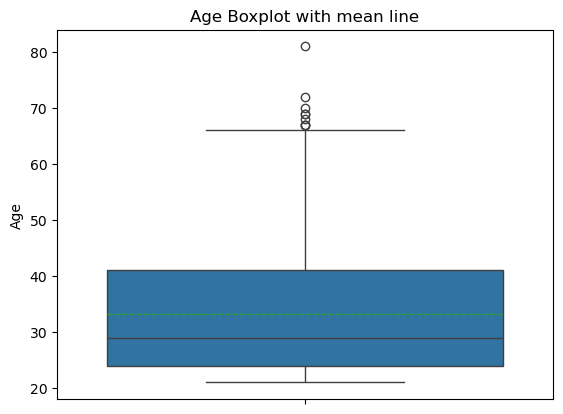

In [57]:
sns.boxplot(diab, y='Age', showmeans=True, meanline=True)
plt.title('Age Boxplot with mean line')
plt.show()

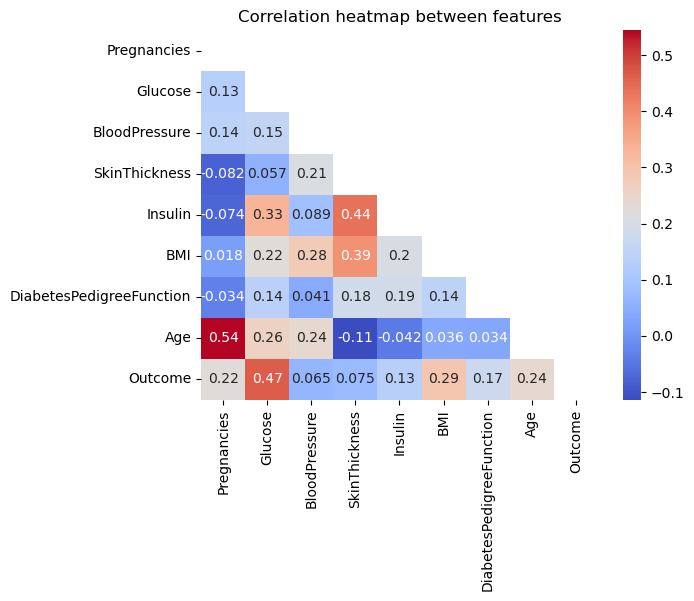

In [44]:
diab_corr =  diab.select_dtypes(include='number').corr()
sns.heatmap(data=diab_corr,
            cmap='coolwarm',
            annot=True,
            mask=np.triu(np.ones_like(diab_corr, dtype=bool)) 
           )
plt.title('Correlation heatmap between features')
plt.show()

#### 3. Set Target

- Set `Outcome` as target.
- Set Features

In [64]:
y = diab['Outcome']
X = diab.drop('Outcome', axis = 1)

In [75]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [130]:
# Create an instance of SelectKBest
kbest = SelectKBest (score_func=chi2, k=4)

In [132]:
# Fit
kbest.fit(X, y)

SelectKBest(k=4, score_func=<function chi2 at 0x000001B516D99940>)

In [134]:
# Print Score
kbestscore = kbest.scores_
kbestscore


array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [136]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [138]:
# Find Top 4 Features
features = X.columns
score_diab = pd.DataFrame({
    'Features' : features,
    'Score' : kbestscore
}) #covert scores to a dataframe

In [140]:
score_diab.sort_values(by='Score', ascending=False).head(4) #top 4 features by score

,Features,Score
4,Insulin,2175.565273
1,Glucose,1411.887041
7,Age,181.303689
5,BMI,127.669343


In [146]:
# Transform X to features
X_trans = kbest.transform(X)
X_trans

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [149]:
# Transform features to a dataframe
X.columns[kbest.get_support()]

Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [151]:
X_trans_df = pd.DataFrame(X_trans, columns=X.columns[kbest.get_support()])
X_trans_df

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0
...,...,...,...,...
763,101.0,180.0,32.9,63.0
764,122.0,0.0,36.8,27.0
765,121.0,112.0,26.2,30.0
766,126.0,0.0,30.1,47.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=3)

In [171]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [219]:
# Print Score
# Find Features
print ('No. of Selected features:', (rfe.n_features_))
print ('Features selected:',(X.columns[rfe.get_support()]))

No. of Selected features: 3
Features selected: Index(['Pregnancies', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



